
<center><img src='Images/scipy_logo.png' style="width:200px"></center>

<br>

# <center><b>Scipy-stats Project</b></center>


<br>

## Table of Contents
***

#### 1. [Introduction]()
#### 2. [Exploration of the Data]()
- [Visualise the Data - Plots](#)<br>

#### 3. [t-Test with Scipy.stats]()<br>
#### 4. [Anova]()<br>


<br>

***
## <center>1. Introduction</center>
***

<br>

The SciPy library contains many statistical functions which are fundamental to data analysis. The scipy.stats package is a sub-package of the SciPy library and mainly deals with probabilistic distributions and statistical functions. It is an open-source library and is continuously growing in functionality.[https://data-flair.training/blogs/scipy-statistical-functions/]

In this project, we will look at the t-test function from the scipy-stats package.

## The null hypothesis/hypothesis testing
***

blablabla

***
# <center> 2. Exploration of the Data </center>
***

<br>

### Import libraries
***

In [10]:
# Numerical arrays.
import numpy as np

# Dataframes.
import pandas as pd

# Plots.
import matplotlib.pyplot as plt

# More aesthetic plots.
import seaborn as sns

# Statistics.
import scipy.stats as ss

# Set default plot size.
plt.rcParams['figure.figsize'] = (12, 6)

# Set default plot style.
plt.style.use("ggplot")

<br>

### Load the data
***

In [11]:
# Load the blood pressure dataset from its URL with pandas.
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv")


<br>

### View some basic info about the data
***

In [12]:
# View basic information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [13]:
# View the first few rows.
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [14]:
# Check for any null values.
df.isnull().count()

patient      120
sex          120
agegrp       120
bp_before    120
bp_after     120
dtype: int64

The result shows there are no null values in the dataset.

In [15]:
# Summary statistics.
df.describe()

,patient,bp_before,bp_after
count,120.000000,120.000000,120.000000
mean,60.500000,156.450000,151.358333
std,34.785054,11.389845,14.177622
min,1.000000,138.000000,125.000000
25%,30.750000,147.000000,140.750000
50%,60.500000,154.500000,149.500000
75%,90.250000,164.000000,161.000000
max,120.000000,185.000000,185.000000


<br>

## Visualise the data
***

<br>

With the following code we are interested in observing the difference in means between the male and female groups.


#### Box plots

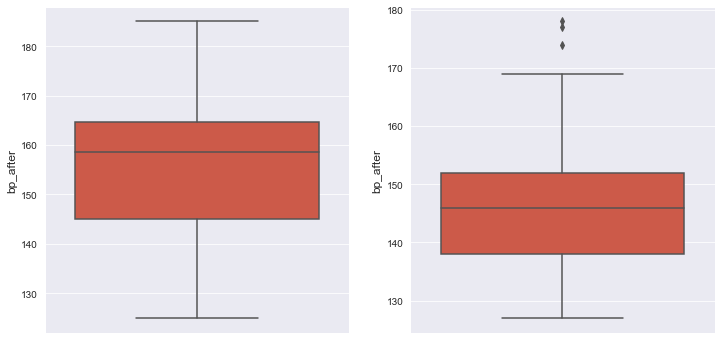

In [51]:
plt.rcParams['figure.figsize'] = (12, 6)
fig, ax = plt.subplots(1, 2)

sns.set_style("darkgrid")
sns.boxplot(ax=ax[0], data=df, y=df['bp_after'][df['sex'] == 'Male'])
sns.boxplot(ax=ax[1], data=df, y=df['bp_after'][df['sex'] == 'Female']);

<br>

#### Histograms with kernal density estimate (kde)

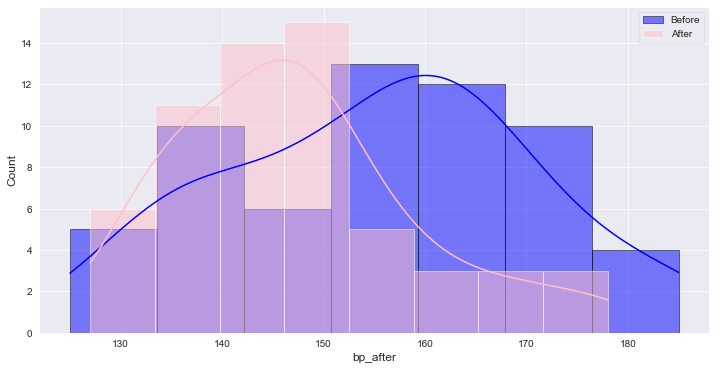

In [56]:
sns.histplot(df['bp_after'][df['sex'] == 'Male'], kde=True, color="blue", edgecolor="black", label="Before")
sns.histplot(df['bp_after'][df['sex'] == 'Female'], kde=True, color="pink", label="After")
plt.legend();


As can be seen in the plots above, the difference in means certainly does appear to be significant. However, it is a good idea to perform a test to figure out if the difference in means is reliable or if it is simply due to chance. This can be measured using a t-Test.

<br>

# T-tests with Scipy.stats
[Scipy t-Test Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
***

<br>

### What is a t-Test?
***

([Recommended read by Ian](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php))

A t-Test is a type of inferential statistic which can tell us whether there is a significant difference between the means of two groups and whether the difference is reliable or if it could simply be due to chance.[https://www.investopedia.com/terms/t/t-test.asp] It is usually implemented on datasets where there is a normal distribution of data which may contain unknown variances. The t-Test is one of the most common statistical tests used in hypothesis testing.


From [Investopedia](https://www.investopedia.com/terms/p/p-value.asp):
- What Is P-Value?

In statistics, the p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct. The p-value is used as an alternative to rejection points to provide the smallest level of significance at which the null hypothesis would be rejected. A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis.


<br>

### Scipy.stats t-Test
***
<br>


<i>Function:</i>

`scipy.stats.ttest_ind()`

<i>From the documentation:</i>

"Calculate the T-test for the means of two independent samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default."


<br>

In [53]:
# Execute t-Test. (Assign t-value to t_ss & p-value to p_ss)
t_ss, p_ss = ss.ttest_ind(df['bp_after'][df['sex'] == 'Male'],
                          df['bp_after'][df['sex'] == 'Female'])

# Print t-value and p_value.
print(f"t-value: {t_ss}\tp-value: {p_ss}")

# Print rounded p_value.
print(f"P_scipy: {p_ss:0.2f}")

t-value: 3.3479506182111387	p-value: 0.0010930222986154283
P_scipy: 0.00


<br>

<b>The p-value is 0.001 which is a statistically significant.</b>


#### Next:
- Maybe test male & female's seperately - could then plot data.
- Do: Levene's test of homogeneity of variances - to check if there are high levels of variance which can lead to incorrect assumptions.